In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing the dataset
dataset = pd.read_csv('customer_churn_data.csv')


In [3]:
dataset.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [5]:
dataset.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [6]:
dataset["InternetService"] = dataset["InternetService"].fillna("")

In [7]:
dataset.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [8]:
dataset.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [9]:
dataset.duplicated().sum()

np.int64(0)

In [10]:
dataset.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [11]:
numeric_columns_data = dataset.select_dtypes( include = ["number"])

In [12]:
numeric_columns_data

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32
...,...,...,...,...,...
995,996,42,41,37.14,1522.74
996,997,62,9,80.93,728.37
997,998,51,15,111.72,1675.80
998,999,39,68,65.67,4465.56


In [13]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [14]:
#-1 strong negative 1 strong positive 0 no linear relation

In [15]:
churn = dataset["Churn"].value_counts()

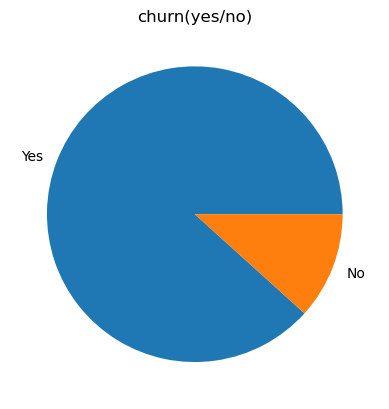

In [16]:
churn.plot(kind="pie")
plt.title("churn(yes/no)")
plt.ylabel("")
plt.show()

In [17]:
dataset.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [18]:
dataset.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [19]:
dataset.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [20]:
dataset.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [21]:
dataset.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [22]:
dataset.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

In [23]:
contract = dataset.groupby("ContractType")["MonthlyCharges"].mean()

In [24]:
contract

ContractType
Month-to-Month    75.909198
One-Year          73.822803
Two-Year          71.334500
Name: MonthlyCharges, dtype: float64

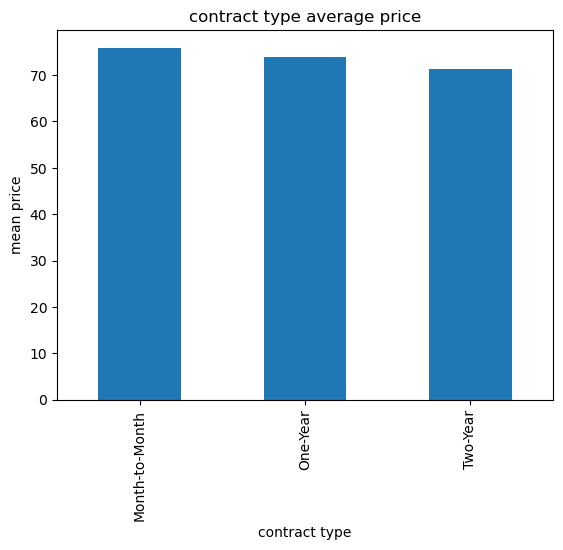

In [25]:
contract.plot(kind = "bar")
plt.ylabel("mean price")
plt.xlabel("contract type")
plt.title("contract type average price")
plt.show()
#Customers with month-to-month contracts 
# not only pay more on average but are also more likely 
# to churn, while customers with one-year or two-year 
# contracts pay less and are generally more loyal.

In [26]:
churn_combined_with_contract = dataset.groupby(["Churn","ContractType"])["MonthlyCharges"].mean()

In [27]:
churn_combined_with_contract

Churn  ContractType  
No     One-Year          62.113662
       Two-Year          63.214348
Yes    Month-to-Month    75.909198
       One-Year          77.636330
       Two-Year          73.760000
Name: MonthlyCharges, dtype: float64

<Axes: xlabel='Churn,ContractType'>

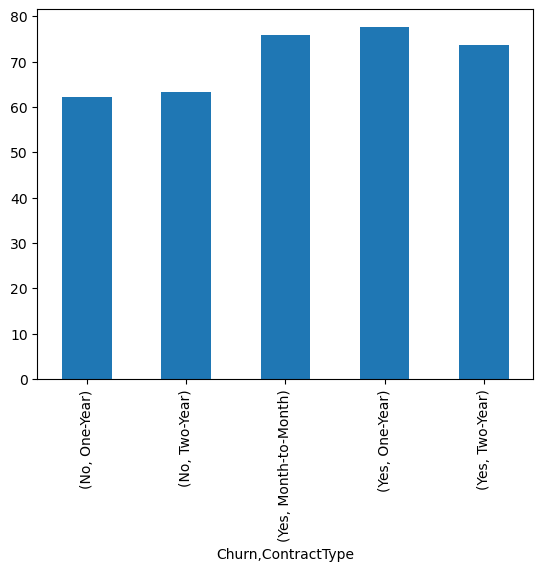

In [28]:
churn_combined_with_contract.plot(kind = "bar")
#no month-to-month churn no 

(array([105.,  94., 105., 108.,  93., 104., 114.,  81., 108.,  88.]),
 array([ 30.   ,  38.996,  47.992,  56.988,  65.984,  74.98 ,  83.976,
         92.972, 101.968, 110.964, 119.96 ]),
 <BarContainer object of 10 artists>)

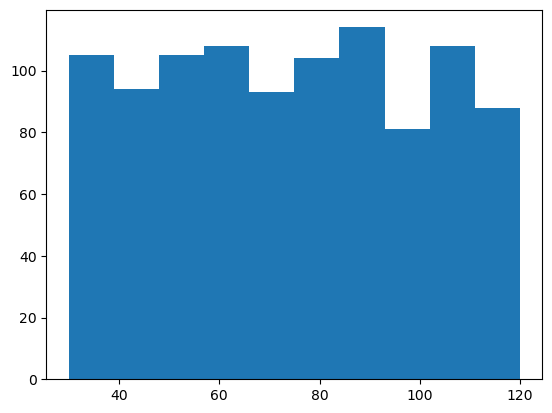

In [29]:
plt.hist(dataset["MonthlyCharges"])

(array([490., 233., 127.,  64.,  36.,  30.,  13.,   2.,   4.,   1.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

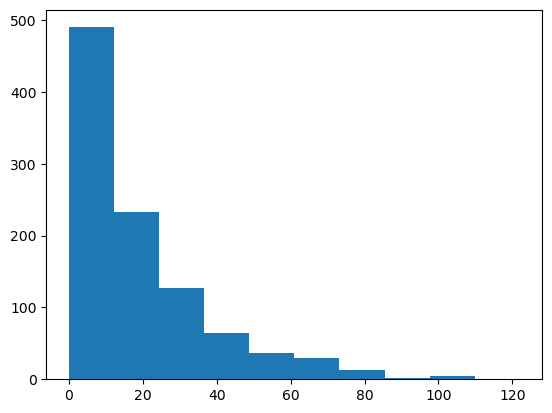

In [30]:
plt.hist(dataset["Tenure"])

In [31]:
dataset.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [32]:
dataset.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [33]:
x = dataset[["Age","Gender","Tenure","MonthlyCharges"]]
y = dataset[["Churn"]]


In [34]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [35]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [36]:
#1 female 0 male
x["Gender"] = x["Gender"].apply(lambda x:1 if x=="Female" else 0)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11760\2271082098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Gender"] = x["Gender"].apply(lambda x:1 if x=="Female" else 0)


In [37]:
x


,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [38]:
y["Churn"] = y["Churn"].apply(lambda x:1 if x == "Yes" else 0)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11760\3104515624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"] = y["Churn"].apply(lambda x:1 if x == "Yes" else 0)


In [39]:
y

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [42]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [43]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [44]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [45]:
x_test = scaler.fit_transform(x_test)

In [46]:
x_test

array([[-1.23829454, -1.0100505 , -0.2576282 ,  0.65711533],
       [ 0.74715662, -1.0100505 ,  1.6040208 , -0.28484081],
       [ 1.89662835,  0.9900495 , -0.49784097,  0.69471442],
       [ 0.43366433, -1.0100505 ,  1.72412718,  0.20434314],
       [ 0.64265919,  0.9900495 ,  0.22279735, -1.32732504],
       [ 0.3291669 , -1.0100505 ,  4.54662728,  0.64563771],
       [-1.55178683, -1.0100505 ,  0.52306331,  1.45500759],
       [-2.17877141, -1.0100505 ,  2.5048187 , -0.38180688],
       [ 0.12017204, -1.0100505 ,  2.38471231, -0.18352116],
       [-0.29781767, -1.0100505 , -1.09837291,  1.22901727],
       [-0.50681253,  0.9900495 , -0.73805375,  0.46714098],
       [-1.34279197,  0.9900495 ,  0.16274415, -0.9620202 ],
       [-0.08882282, -1.0100505 , -0.91821333, -0.47402359],
       [-0.19332024, -1.0100505 , -1.09837291, -1.4480379 ],
       [-0.92480225,  0.9900495 , -0.49784097,  0.59853991],
       [ 0.74715662, -1.0100505 ,  1.06354206, -0.3774533 ],
       [ 1.26964377,  0.

In [47]:
from sklearn.metrics import accuracy_score
def modelperformance(prediction):
    print("Accuracy of model is {}".format(accuracy_score(y_test,prediction)))

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
log_model = LogisticRegression()

In [51]:
import warnings
warnings.filterwarnings("ignore")
log_model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [52]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [53]:
y_pred = log_model.predict(x_test)

In [54]:
modelperformance(y_pred)

Accuracy of model is 0.885


In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"]
}

In [57]:
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid,cv= 5)

In [58]:
gridkn.fit(x_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [59]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [60]:
y_pred = gridkn.predict(x_test)

In [61]:
modelperformance(y_pred)

Accuracy of model is 0.875


In [62]:
from sklearn.svm import SVC

In [63]:
svm = SVC()

In [64]:
param_grid = {
    "C": [0.01,0.1,0.5,1],
    "kernel": ["linear","rbf","poly"]
}

In [65]:
gridsvc = GridSearchCV(svm,param_grid,cv = 5)

In [66]:
gridsvc.fit(x_train,y_train)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [67]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [68]:
y_pred = gridsvc.predict(x_test)

In [69]:
modelperformance(y_pred)

Accuracy of model is 0.88


In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
param_grid = {
    "criterion": ["gini","entropy"],
    "splitter": ["best","random"],
    "max_depth": [None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [72]:
grid_tree = GridSearchCV(DecisionTreeClassifier(),param_grid,cv = 5)

In [73]:
grid_tree.fit(x_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [74]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [75]:
y_pred = grid_tree.predict(x_test)

In [76]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [77]:
modelperformance(y_pred)

Accuracy of model is 0.85


In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc_model  = RandomForestClassifier

In [79]:
best_model = gridsvc.best_estimator_

In [80]:
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [81]:
x.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')